In [1]:
from pancakes import Pancakes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import time

from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

%matplotlib widget

In [2]:
tess_file = './PS1_to_TESS/data/tess2019359002923-s0020-1-1-0165-s_ffic.fits'
savepath = './SkyCells/Sector020/'

pancakes = Pancakes(tess_file, 
                    savepath = '/Users/zgl12/Python_Scripts/SynDiff/', 
                    num_cores = 2, sector=20, use_multiple_cores_per_task = False, 
                    overwrite = True, buffer = 120)

Sector: 20
Master file already exists. Will overwrite master file creation...


Getting all WCS: 100%|██████████| 1739/1739 [00:19<00:00, 89.29it/s]


In [3]:
pancakes.whipped_cream()

Processing skycell.2246.022, 3: 100%|██████████| 5387/5387 [22:41<00:00,  3.96it/s]


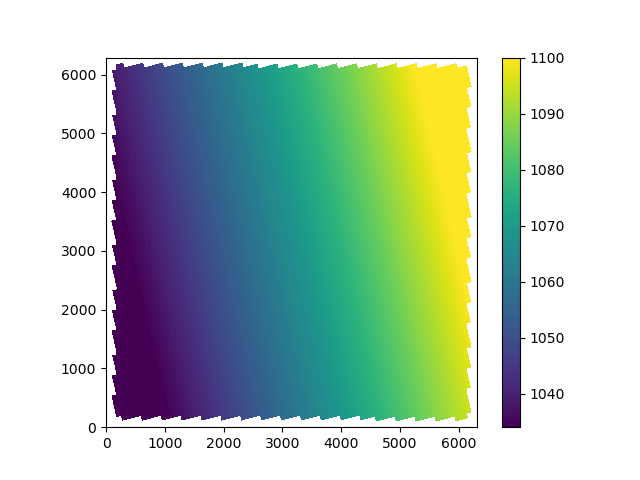

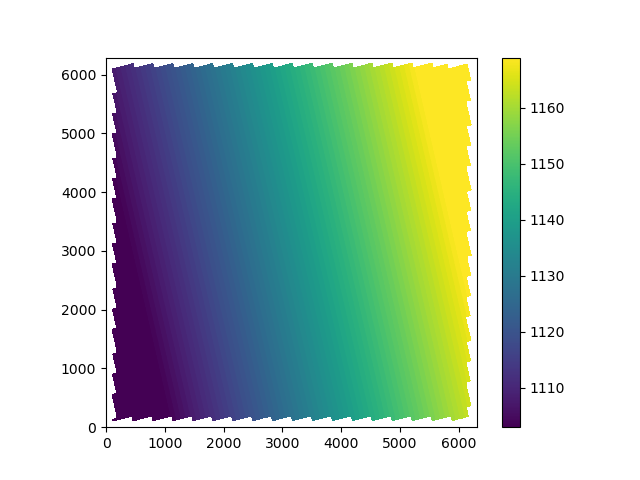

In [5]:

hdu = fits.open('/Users/zgl12/Python_Scripts/SynDiff/TESS_s0020_1_skycell.2246.021_00002_.fits.gz')
fll_0 = hdu[1].data.astype(float)
fll_0_hdr = hdu[2].header
hdu.close()

hdu = fits.open('/Users/zgl12/Python_Scripts/SynDiff/TESS_s0020_1_skycell.2246.022_00003_.fits.gz')
fll_1 = hdu[1].data.astype(float)
fll_1_hdr = hdu[1].header
hdu.close()

fll_0[fll_0 > 1e4] = np.nan
fll_1[fll_1 > 1e4] = np.nan

plt.figure()
plt.imshow(fll_0, origin='lower', cmap='viridis', vmin = np.nanpercentile(fll_0, 5), vmax = np.nanpercentile(fll_0, 95))
plt.colorbar()
plt.savefig('fll_0.png')
plt.show()

plt.figure()
plt.imshow(fll_1, origin='lower', cmap='viridis', vmin = np.nanpercentile(fll_1, 5), vmax = np.nanpercentile(fll_1, 95))
plt.colorbar()
plt.show()

In [9]:
hdu = fits.open('/Users/zgl12/Python_Scripts/SynDiff/TESS_s0020_1_master_pixels2skycells.fits.gz')
master = hdu[1].data.astype(float)
hdu.close()

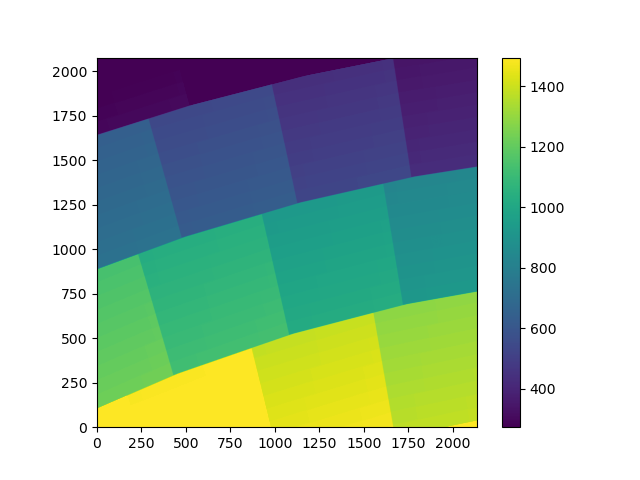

In [11]:
plt.figure()
plt.imshow(master, origin='lower', cmap='viridis', vmin = np.nanpercentile(master, 5), vmax = np.nanpercentile(master, 95))
plt.colorbar()
plt.savefig('master.png')
plt.show()